In [531]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


Importing libraries and datasets

In [532]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
``
from sklearn import (
    linear_model, metrics, neural_network, pipeline, preprocessing, model_selection
)

%matplotlib inline

SyntaxError: invalid syntax (65554230.py, line 5)

In [ ]:
df_us_cities_zips = pd.read_csv(r'/Users/prakhars03/Library/CloudStorage/OneDrive-TheUniversityofChicago/Desktop/College+school/UChicago/Citadel Datathon/census_code_mappers/us_cities_zips.csv')
df_income_by_zip = pd.read_csv(r'/Users/prakhars03/Library/CloudStorage/OneDrive-TheUniversityofChicago/Desktop/College+school/UChicago/Citadel Datathon/ACSST5Y2021/ACSST5Y2021.S1901-Data.csv')
df_green_zip = pd.read_csv(r'/Users/prakhars03/Library/CloudStorage/OneDrive-TheUniversityofChicago/Desktop/College+school/UChicago/Citadel Datathon/greenspace_data/percent_cover_zipcode.csv')
df_green_zip['ZIP'] = 'ZCTA5 ' + df_green_zip['ZIP'].astype(str)
df_income_by_zip

,GEO_ID,NAME,S1901_C01_001E,S1901_C01_012E,S1901_C01_013E,S1901_C02_001E,S1901_C02_012E,S1901_C02_013E,S1901_C03_001E,S1901_C03_012E,S1901_C04_001E,S1901_C04_012E,S1901_C04_013E
0,Geography,Geographic Area Name,Estimate!!Households!!Total,Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Estimate!!Families!!Total,Estimate!!Families!!Median income (dollars),Estimate!!Families!!Mean income (dollars),Estimate!!Married-couple families!!Total,Estimate!!Married-couple families!!Median inco...,Estimate!!Nonfamily households!!Total,Estimate!!Nonfamily households!!Median income ...,Estimate!!Nonfamily households!!Mean income (d...
1,860Z200US00601,ZCTA5 00601,5397,15292,19468,3576,16283,21779,2170,19060,1821,9386,13044
2,860Z200US00602,ZCTA5 00602,12858,18716,27778,8922,23199,32073,5715,26600,3936,11242,16419
3,860Z200US00603,ZCTA5 00603,19295,16789,29102,12777,21537,34523,6925,35043,6518,10639,16824
4,860Z200US00606,ZCTA5 00606,1968,18835,22236,1299,21044,24294,584,25455,669,15849,16312
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33770,860Z200US99923,ZCTA5 99923,13,-,N,0,-,-,0,-,13,-,N
33771,860Z200US99925,ZCTA5 99925,345,70625,83366,217,79375,88552,149,95417,128,23958,58940
33772,860Z200US99926,ZCTA5 99926,457,58229,71467,349,80625,79477,238,98333,108,31250,41015
33773,860Z200US99927,ZCTA5 99927,11,-,N,0,-,-,0,-,11,-,N


In [ ]:
header_row = df_income_by_zip.iloc[0, :].to_list()
header_row

['Geography',
 'Geographic Area Name',
 'Estimate!!Households!!Total',
 'Estimate!!Households!!Median income (dollars)',
 'Estimate!!Households!!Mean income (dollars)',
 'Estimate!!Families!!Total',
 'Estimate!!Families!!Median income (dollars)',
 'Estimate!!Families!!Mean income (dollars)',
 'Estimate!!Married-couple families!!Total',
 'Estimate!!Married-couple families!!Median income (dollars)',
 'Estimate!!Nonfamily households!!Total',
 'Estimate!!Nonfamily households!!Median income (dollars)',
 'Estimate!!Nonfamily households!!Mean income (dollars)']

In [ ]:
header_row[2] = header_row[2][0:-1]
df_income_by_zip.columns = header_row
df_income_by_zip = df_income_by_zip.iloc[1:, :]
df_income_by_zip = df_income_by_zip.rename(columns={'Geographic Area Name': 'ZIP'})
df_income_by_zip = df_income_by_zip.replace(('-', '**', '****', 'N', 'median+', 'median-', '(X)'), np.nan)
df_income_by_zip = df_income_by_zip.replace('250,000+', 250000)
df_income_by_zip

,Geography,ZIP,Estimate!!Households!!Tota,Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Estimate!!Families!!Total,Estimate!!Families!!Median income (dollars),Estimate!!Families!!Mean income (dollars),Estimate!!Married-couple families!!Total,Estimate!!Married-couple families!!Median income (dollars),Estimate!!Nonfamily households!!Total,Estimate!!Nonfamily households!!Median income (dollars),Estimate!!Nonfamily households!!Mean income (dollars)
1,860Z200US00601,ZCTA5 00601,5397,15292,19468,3576,16283,21779,2170,19060,1821,9386,13044
2,860Z200US00602,ZCTA5 00602,12858,18716,27778,8922,23199,32073,5715,26600,3936,11242,16419
3,860Z200US00603,ZCTA5 00603,19295,16789,29102,12777,21537,34523,6925,35043,6518,10639,16824
4,860Z200US00606,ZCTA5 00606,1968,18835,22236,1299,21044,24294,584,25455,669,15849,16312
5,860Z200US00610,ZCTA5 00610,8934,21239,29555,6041,25097,34188,3757,28653,2893,12832,16756
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33770,860Z200US99923,ZCTA5 99923,13,NaN,NaN,0,NaN,NaN,0,NaN,13,NaN,NaN
33771,860Z200US99925,ZCTA5 99925,345,70625,83366,217,79375,88552,149,95417,128,23958,58940
33772,860Z200US99926,ZCTA5 99926,457,58229,71467,349,80625,79477,238,98333,108,31250,41015
33773,860Z200US99927,ZCTA5 99927,11,NaN,NaN,0,NaN,NaN,0,NaN,11,NaN,NaN


Sorting data such that only chosen city zip codes are there. Then removing empty columns and columns with only (X) values.

In [ ]:
city_zip_codes = []
df_city_zip = df_us_cities_zips.loc[df_us_cities_zips['city'] == 'Louisville']
for zc in df_city_zip['zip_code']:
    zc = 'ZCTA5 ' + str(zc)
    city_zip_codes.append(zc)
df_city_income_zip = df_income_by_zip.loc[df_income_by_zip['ZIP'].isin(city_zip_codes), :]

df_city_income_zip = df_city_income_zip.dropna(axis=0)

df_city_income_zip

,Geography,ZIP,Estimate!!Households!!Tota,Estimate!!Households!!Median income (dollars),Estimate!!Households!!Mean income (dollars),Estimate!!Families!!Total,Estimate!!Families!!Median income (dollars),Estimate!!Families!!Mean income (dollars),Estimate!!Married-couple families!!Total,Estimate!!Married-couple families!!Median income (dollars),Estimate!!Nonfamily households!!Total,Estimate!!Nonfamily households!!Median income (dollars),Estimate!!Nonfamily households!!Mean income (dollars)
14900,860Z200US45202,ZCTA5 45202,8867,80178,115278,2470,110104,166852,1739,147019,6397,67026,94313
14901,860Z200US45203,ZCTA5 45203,1293,29514,65546,637,19454,62910,189,166128,656,39868,68105
14902,860Z200US45204,ZCTA5 45204,2705,35564,53086,1245,44071,66162,612,82656,1460,28532,40133
14903,860Z200US45205,ZCTA5 45205,7080,31241,43324,4133,38278,50700,2007,64663,2947,20598,30390
14904,860Z200US45206,ZCTA5 45206,6149,45530,75424,1935,88531,121749,1218,139211,4214,38929,53713
14905,860Z200US45207,ZCTA5 45207,2435,39384,95021,1096,54432,164272,469,98466,1339,35694,37156
14906,860Z200US45208,ZCTA5 45208,8426,125347,179339,4530,175826,240255,3909,197908,3896,73151,104849
14907,860Z200US45209,ZCTA5 45209,6078,77845,98336,1769,130479,149949,1455,150354,4309,59527,76695
14908,860Z200US45211,ZCTA5 45211,15479,46736,63377,8218,56948,75365,4045,100005,7261,36222,46459
14909,860Z200US45212,ZCTA5 45212,9756,49465,67613,4038,71777,90021,2637,95683,5718,39108,51056


Sorting green cover data by zip code

In [ ]:
df_city_cover_zip = df_green_zip.loc[df_green_zip['ZIP'].isin(city_zip_codes), :]
df_city_cover_zip


,ZIP,pct_park
18019,ZCTA5 45241,11.697
18020,ZCTA5 45242,2.633
18021,ZCTA5 45243,7.842
18022,ZCTA5 45244,8.791
18023,ZCTA5 45245,5.725
18024,ZCTA5 45246,9.886
18025,ZCTA5 45247,2.822
18026,ZCTA5 45248,3.618
18385,ZCTA5 45249,2.748
18386,ZCTA5 45251,10.755


Merging percentage cover to income data

In [ ]:
df_cityandcover_zip = pd.merge(df_city_income_zip, df_city_cover_zip[['ZIP', 'pct_park']], on='ZIP')

Doing a scatterplot to check for correlation

/var/folders/md/_w6bxcps70gc_gzhk5rkxtw00000gn/T/ipykernel_64859/4112475781.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_cityandcover_zip.iloc[:, 2:] = df_cityandcover_zip.iloc[:, 2:].astype(int)


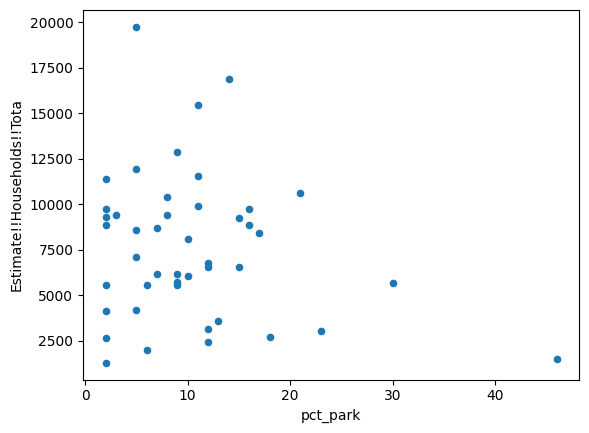

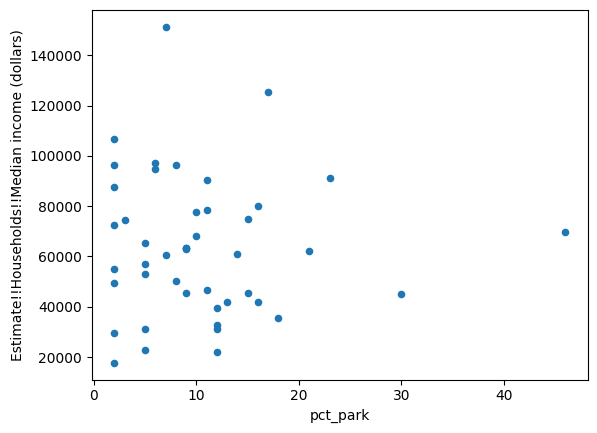

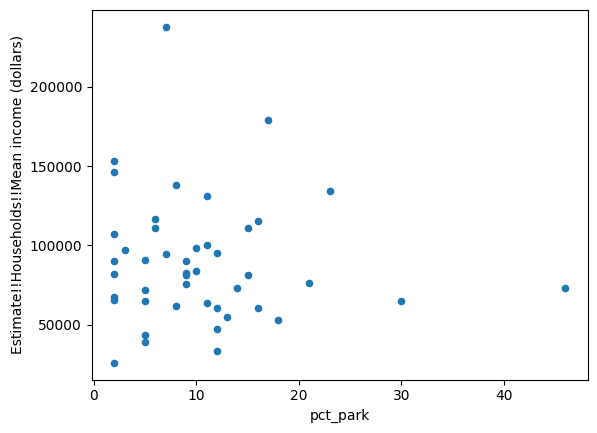

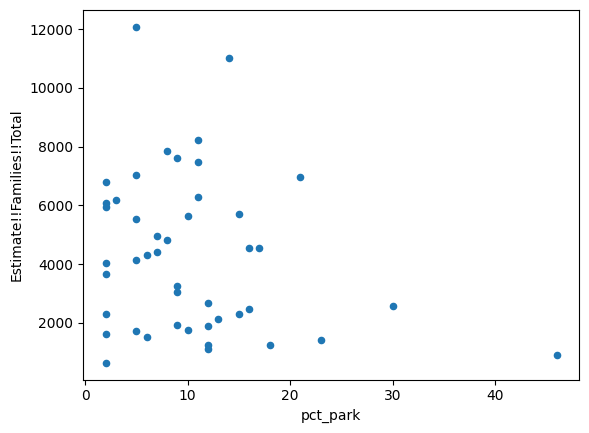

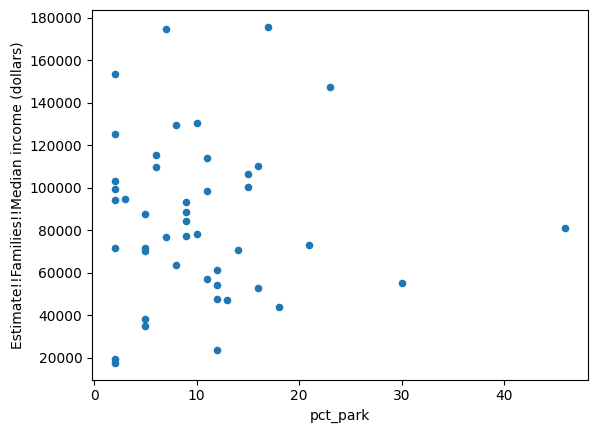

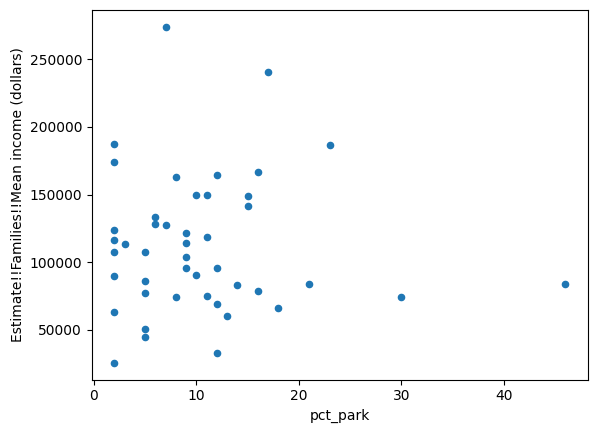

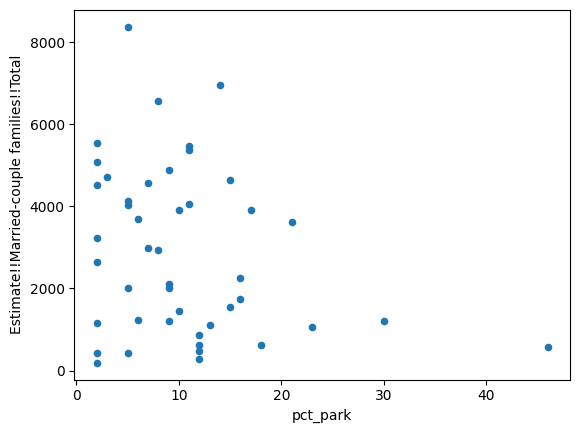

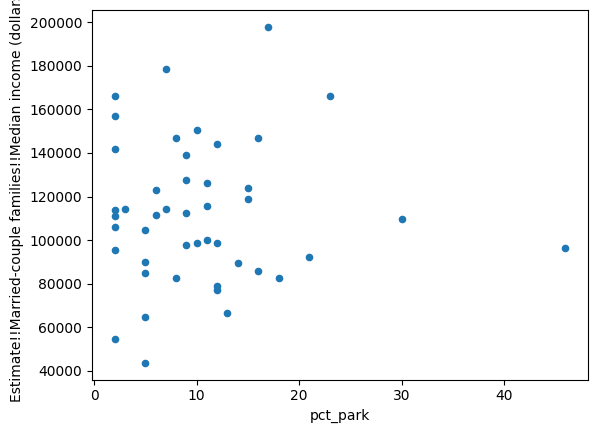

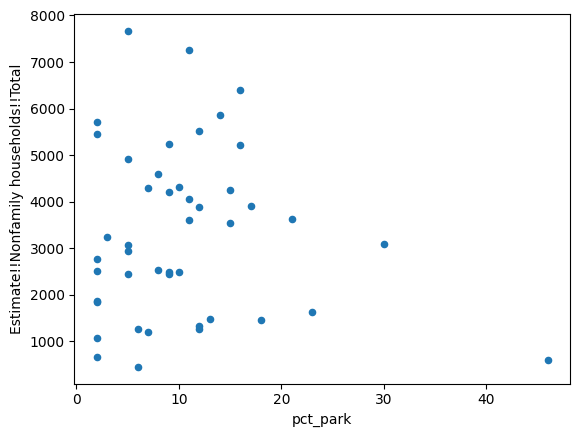

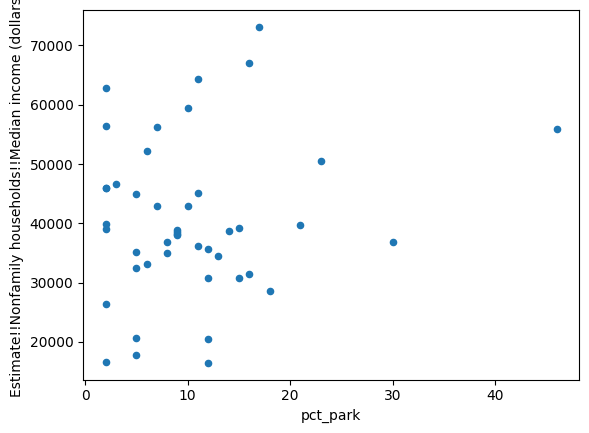

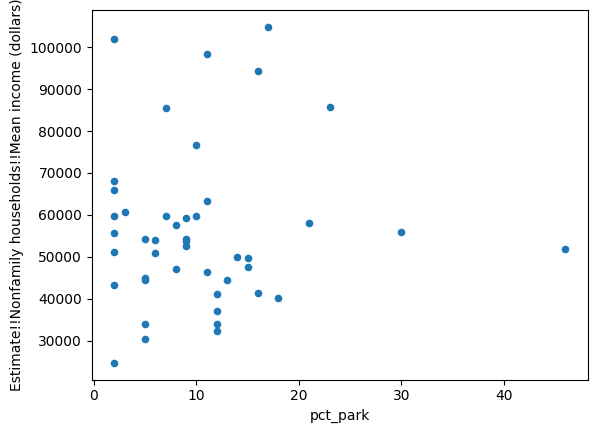

In [ ]:
from scipy.stats import linregress

df_cityandcover_zip.iloc[:, 2:] = df_cityandcover_zip.iloc[:, 2:].astype(int)
df_cityandcover_zip['pct_park'] = df_cityandcover_zip['pct_park'].astype(float)

for col in df_cityandcover_zip.columns[2:13]:
    df_cityandcover_zip.plot.scatter(x='pct_park', y=col)
